<a href="https://colab.research.google.com/github/PALLITULASIRAM/task5/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Please upload your 'Housing.csv' file from Kaggle:


Saving Housing.csv to Housing.csv
✅ Dataset loaded successfully!
Shape: (545, 13)

🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

📊 Statistical Summary:
              price

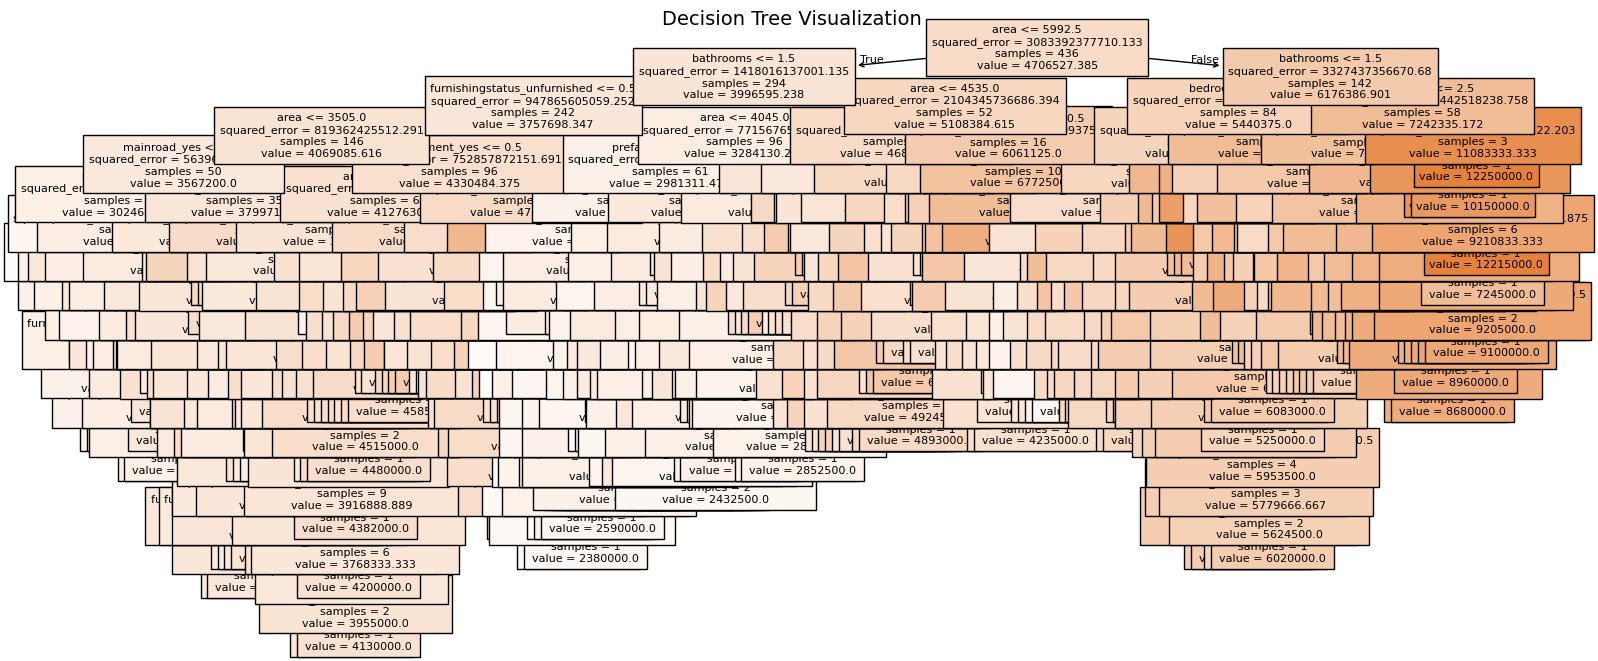


⚖️ Overfitting Analysis:
Train R²: 0.9985
Test R²:  0.4771

🌿 Limited Depth Tree R²: 0.4061

🌲 Random Forest Performance:
MSE: 1961585044320.3433
R² Score: 0.611918531405699


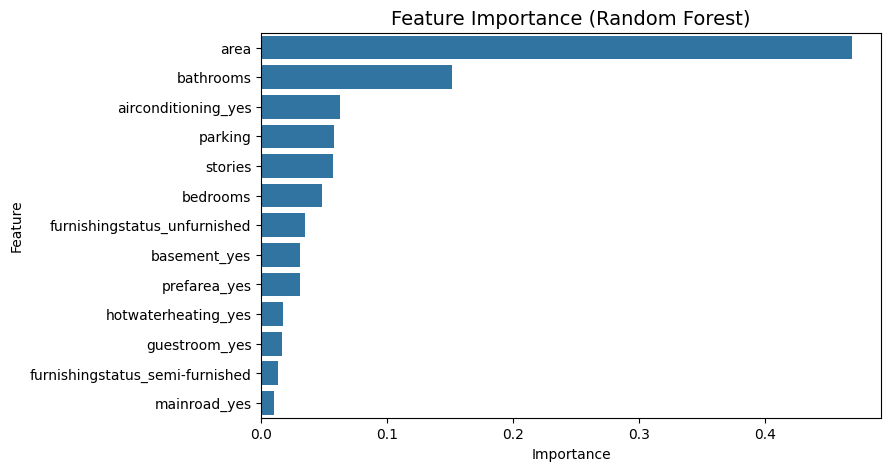


📈 Cross-Validation Results:
Scores: [ -2.99394558  -8.34338222 -20.30138449 -18.77622628 -10.02591241]
Average CV Score: -12.0882

✅ Conclusion:
- Decision Tree fits well but can overfit without depth control.
- Limiting depth improves generalization.
- Random Forest performs best overall with high accuracy.
- Feature Importance shows key factors affecting price.



In [1]:
# ============================================
# 🏠 Task 5: Decision Trees & Random Forests
# Dataset: Housing Price Prediction
# Tools: Scikit-learn, Matplotlib, Seaborn
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

# Step 2: Upload Dataset Manually
print("📁 Please upload your 'Housing.csv' file from Kaggle:")
uploaded = files.upload()

# Step 3: Load Dataset
df = pd.read_csv("Housing.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

# Step 4: Data Overview
print("\n🔍 Dataset Information:")
print(df.info())
print("\n📊 Statistical Summary:")
print(df.describe())

# Step 5: Handle Missing Values (if any)
df = df.dropna()
print("\n✅ After removing missing values:", df.shape)

# Step 6: Convert Categorical Columns to Numeric
cat_cols = df.select_dtypes(include='object').columns
print("\n🧩 Categorical Columns:", list(cat_cols))

df = pd.get_dummies(df, drop_first=True)
print("✅ Converted categorical columns to numeric")

# Step 7: Feature Selection
X = df.drop(['price'], axis=1)
y = df['price']

# Step 8: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Data split completed")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Step 9: Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Step 10: Predictions & Evaluation (Decision Tree)
y_pred_dt = dt.predict(X_test)
print("\n🌳 Decision Tree Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))

# Step 11: Visualize the Decision Tree
plt.figure(figsize=(18, 8))
plot_tree(dt, feature_names=X.columns, filled=True, fontsize=8)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()

# Step 12: Analyze Overfitting
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"\n⚖️ Overfitting Analysis:")
print(f"Train R²: {train_score:.4f}")
print(f"Test R²:  {test_score:.4f}")

# Step 13: Control Tree Depth
dt_limited = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
limited_score = dt_limited.score(X_test, y_test)
print(f"\n🌿 Limited Depth Tree R²: {limited_score:.4f}")

# Step 14: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 15: Random Forest Evaluation
print("\n🌲 Random Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

# Step 16: Feature Importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=importances, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.show()

# Step 17: Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\n📈 Cross-Validation Results:")
print("Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores).round(4))

# Step 18: Conclusion
print("""
✅ Conclusion:
- Decision Tree fits well but can overfit without depth control.
- Limiting depth improves generalization.
- Random Forest performs best overall with high accuracy.
- Feature Importance shows key factors affecting price.
""")
